In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd

# **ROZWIĄZANIE**

In [27]:
c = 15
N = 300
T = int(3*10e4)

p = np.zeros(N) #tablica posiadanych kokosów
p += c

p_rand = np.arange(0,N) #lista osob
p_z = [] #liczba osob - zero kokosów

for i in range(T):
  
  temp = random.sample(range(0,N),2) #losowanie graczy
  win = random.random()
  if win < 0.5 and p[temp[1]]>0: #wygrywa pierwszy gracz
    coc = 1
  elif win >= 0.5 and p[temp[0]]>0: #wygrywa drugi gracz
    coc = -1
  else:
    coc = 0
  p[temp[0]] += coc
  p[temp[1]] -= coc


  '''random.shuffle(p_rand) #mieszanie ludzi
  rand = np.random.rand(len(p_rand)//2) #losowanie kto wygra z pary
  rand = np.where(rand >= 0.5, 1, -1) # 1 - wygrala pierwsza osoba, -1 - przegrala pierwsza osoba

  for j in range(len(p_rand)//2):
    if not ((p[p_rand[2*j]] == 0 and rand[j]<0) or (p[p_rand[2*j+1]] == 0 and rand[j]>0)): #sprawdzenie, czy przegrana osoba ma kokosy
      p[p_rand[2*j]] += rand[j]
      p[p_rand[2*j + 1]] -= rand[j]'''
  
  if i%1000 == 0:
    p_z.append(np.sum(p == 0)) #sumowanie osob posiadajacych 0 kokosow

# **RYSUNEK**

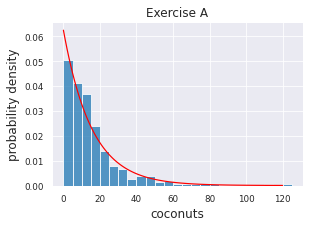

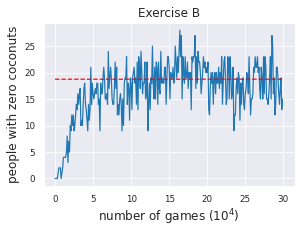

In [40]:
from matplotlib.pyplot import figure

sns.set_style('darkgrid')
sns.set_context("paper", rc = {"font.size":12, "axes.titlesize":12, "axes.labelsize":12}) 

df = pd.DataFrame(p)
x = np.arange(min(p),max(p))
func = 1/(1+c) * np.exp(-x/(c+0.5))

figure(figsize=(4.5, 3))

sns.histplot(p, binwidth = 5, stat = "density")

plt.plot(x,func, 'r')
plt.title("Exercise A")
plt.xlabel('coconuts')
plt.ylabel('probability density')
plt.savefig("coc_A.pdf",bbox_inches='tight')
plt.show()

y = np.zeros(T)
y += func[0]*N

figure(figsize=(4.5, 3))
plt.plot(np.arange(0, T, 1000)/10**4, p_z, '-')
plt.plot(np.arange(0, T)/10**4, y, 'r--')
plt.title("Exercise B")
plt.xlabel('number of games ($10^4$)')
plt.ylabel('people with zero coconuts')
plt.savefig("coc_B.pdf",bbox_inches='tight')

plt.show()